# Initial Setup

* In this notebook, we will download the `book` dataset which contains many books in English in tokenized text format. We will process these texts.

In [ ]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

# Text Analysis

In [ ]:
# Choosing Moby Dick text
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
# Text Tokens
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

## Measure of Lexical Richness in a Text:
$$ R_l = \frac{\text{total unique words}}{\text{total words}} = \frac{\text{vocabulary length}}{\text{text length}}$$


In [ ]:
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [ ]:
# Lexical Richness Meassure
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [ ]:
# Python function for measure
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
# We can calculate the percentage of text occupied by a word in a long string of text.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
# And calculate the count of the number of times it appears:
text1.count('monster')

49

# Language Statistics

The simplest statistical calculations that can be performed on a text or corpus are those related to word frequency.

* We can build a dictionary in Python where the keys are words and the values are the frequencies of occurrences of those words.

* Example: `dic = {'monster': 49, 'boat': 54, ...}`


In [ ]:
# METHOD NOT recommended for very large datasets
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

## FreqDist method of NLTK

In [ ]:
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

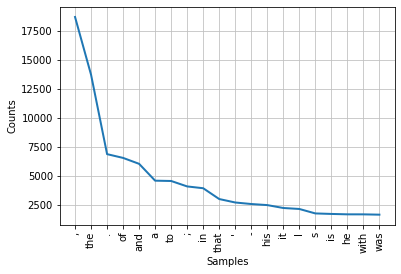

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

## Fine-Grained Content Distributions

* As we saw in the previous section, the most frequent tokens in a text are not necessarily the words that provide the most information about the content.
* Therefore, it is better to filter and build frequency distributions that do not consider punctuation marks or special characters.


In [ ]:
# It may be more interesting to study words that have a specific minimum length.
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

We can now build a list of tuples based on the pre-calculated counts from the `FreqDist` function, like this:

`fdist_filtered = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Then we can convert the created object to `np.array` format using **Numpy** to sort by the most frequent words.

`fdist_filtered = np.array(fdist_filtered, *args)`

`np.sort(fdist_filtered, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

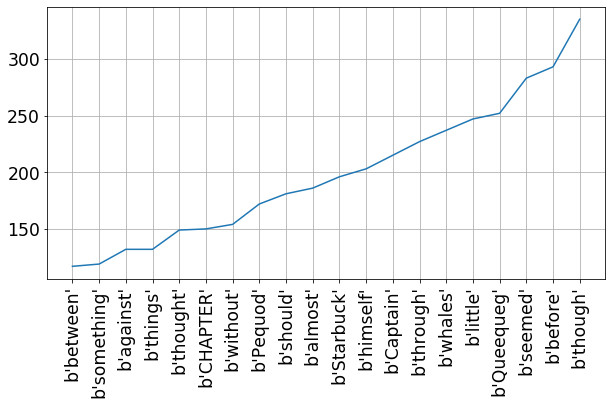

In [ ]:
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()